#### We aim to construct a statistical test to determine whether our sample comes from an exponential distribution with a specified parameter $\lambda$. We will employ an unbiased estimator of minimal variance for this parameter. Our objective is to build a test that is sensitive to the scaling of the data.

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#####  Function to compute the Lilliefors test for exponential distribution

In [7]:
def uniform_1(X, n):
    # Compute the sample mean
    stat = np.sum(X) / n
    # Standardize the data
    Z = X / stat
    # Sort the standardized data
    Z.sort()
    # Compute the Lilliefors test statistic
    LT = []
    for i in range(n):
        LT.append(max(abs(i / n - stats.expon.cdf(Z[i])), abs((i - 1) / n - stats.expon.cdf(Z[i]))))
    L = max(LT)
    return L

#####  Function to compute the Anderson-Darling test for exponential distribution

In [8]:
def uni_2(X, n):
    # Compute the sample mean
    stat = np.sum(X) / n
    # Standardize the data
    Z = X / stat
    # Sort the standardized data
    Z.sort()
    # Compute the Anderson-Darling test statistic
    A = 0
    for i in range(n):
        A += (2 * i - 1) * (np.log(stats.expon.cdf(Z[i])) + np.log(1 - stats.expon.cdf(Z[n - 1 - i])))
    A = -1 - 1 / n ** 2 * A
    return A

##### Monte Carlo simulation

In [9]:
# Simulation parameters
n = 200
alpha = 0.05
mc = 1000

LMC_1 = []
AMC = []
for k in range(mc):
    # Generate exponential data for Monte Carlo simulations
    XMC_1 = np.random.exponential(size=n)
    # Standardize the data
    ZMC_1 = XMC_1 / np.mean(XMC_1)
    ZMC_1.sort()
    # Compute Lilliefors test statistics for Monte Carlo simulations
    LTMC_1 = [max(abs(i / n - stats.expon.cdf(ZMC_1[i])), abs((i - 1) / n - stats.expon.cdf(ZMC_1[i]))) for i in range(n)]
    LMC_1.append(max(LTMC_1))
    
    # Compute Anderson-Darling test statistics for Monte Carlo simulations
    AMC.append(0)
    for i in range(n):
        AMC[k] += (2 * i - 1) * (np.log(stats.expon.cdf(ZMC_1[i])) + np.log(1 - stats.expon.cdf(ZMC_1[n - 1 - i])))
    AMC[k] = -1 - 1 / n ** 2 * AMC[k]

# Computing test power
Moc = []
Moc_1 = []
for k in range(1, 61):
    d = 0.05 * k
    T = np.zeros(mc)
    T_1 = np.zeros(mc)
    P = np.zeros(mc)
    P_1 = np.zeros(mc)
    M = np.zeros(mc)
    M_1 = np.zeros(mc)
    for i in range(mc):
        pL = 0
        aL = 0
        # Generate gamma distributed data
        X = np.random.gamma(d, 1, size=n)
        # Compute test statistic for Lilliefors test
        T[i] = uniform_1(X, n)
        # Compute test statistic for Anderson-Darling test
        T_1[i] = uni_2(X, n)
        for j in range(mc):
            if LMC_1[j] > T[i]:
                pL += 1
        for j in range(mc):
            if AMC[j] > T_1[i]:
                aL += 1
        P[i] = pL / mc
        P_1[i] = aL / mc
        if P[i] < alpha:
            M[i] = 1
        if P_1[i] < alpha:
            M_1[i] = 1
    Moc.append(np.mean(M))
    Moc_1.append(np.mean(M_1))

##### Plot

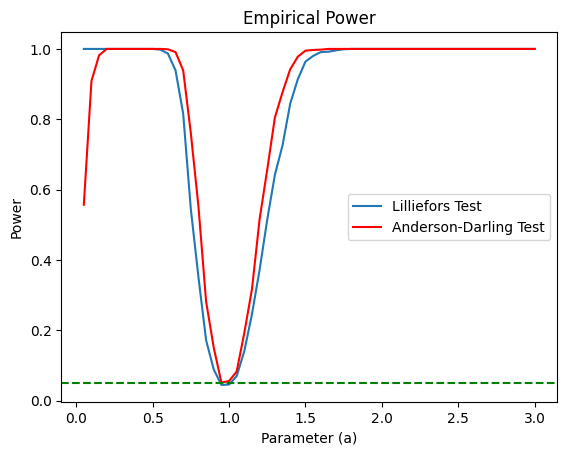

In [10]:
x = np.arange(0.05, 3.05, 0.05)
plt.plot(x, Moc, label='Lilliefors Test')
plt.plot(x, Moc_1, label='Anderson-Darling Test', color='red')
plt.axhline(y=0.05, color='green', linestyle='--')
plt.xlabel('Parameter (a)')
plt.ylabel('Power')
plt.title('Empirical Power')
plt.legend()
plt.show()